In [1]:
import numpy as np
import pandas as pd

Problema1.\
X es una muestra de una distribución coseno: $f(x)=C \frac{1}{2\pi}(1+cos(\frac{x}{a}-b)$
para $-\pi<\frac{x}{a}-b<\pi$
y donde C es una constante de normalización.
"a" se conoce como la escala y "b" como la localización.
Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [2]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize._numdiff import approx_derivative
# Función de log-verosimilitud
def log_likelihood(params):
    a, b = params
    f = (1 / (2 * np.pi)) * (1 + np.cos(x / a - b))
    log_f = np.log(f + 1e-9) 
    return -np.sum(log_f) 

valores_i = [1, 0]
result = minimize(log_likelihood, valores_i, method='Nelder-Mead')
a, b = result.x
print("a=", a)
print("b=", b)

def hessian(func, params):
    return approx_derivative(
        lambda p: approx_derivative(func, p),
        params,
        
    )
hess = hessian(log_likelihood, result.x)

hessian_inv = np.linalg.inv(hess) # Aproximación de la matriz inversa de la Hessiana
std_errors = np.sqrt(np.diag(hessian_inv))  # Errores estándar
z_critical = norm.ppf(0.975)  # Valor crítico para 95%
conf_intervals = [(param - z_critical * err, param + z_critical * err) for param, err in zip(result.x, std_errors)]

print(f"Intervalo de confianza de a(95%): {conf_intervals[0]}")
print(f"Intervalo de confianza de b(95%): {conf_intervals[1]}")

a= 0.7928690803719871
b= 1.1638940028614486
Intervalo de confianza de a(95%): (0.7402209012200738, 0.8455172595239004)
Intervalo de confianza de b(95%): (0.8865600428702836, 1.4412279628526137)


Problema 2. Con la misma secuencia de datos del problema anterior x. Imagína que no conoces la distribución de donde proviene la muestra. Estima el primer momento de la distribución $\mu=\bar{x}$
 (promedio) y enstima el intervalo de confianza del 95%.

In [4]:
import scipy.stats as stats

# Paso 1: Estimar el promedio muestral
mean_x = np.mean(x)

# Paso 2: Estimar la desviación estándar muestral
std_x = np.std(x, ddof=1)

# Paso 3: Calcular el intervalo de confianza del 95%
n = len(x)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor crítico de t de Student
sem = std_x / np.sqrt(n)

# Intervalo de confianza del 95%
conf_interval = (mean_x - t_critical * sem, mean_x + t_critical * sem)

print(f'promedio={mean_x}')
print(f'intervalo de confianza={conf_interval}')

promedio=2.1342042433999997
intervalo de confianza=(1.795202751766069, 2.4732057350339307)


Problema 3.\
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron $\sigma^{2}_{1}$ = .273 y $\sigma^{2}_2$ 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.



In [5]:
import scipy.stats as stats
s1 = 0.273
s2 = 0.094
n=10
alpha = 0.05

F_obs = s1 / s2

# Grados de libertad
df1 = n - 1
df2 = n - 1

F_c1= stats.f.ppf(alpha / 2, df1, df2)
F_c2= stats.f.ppf(1 - alpha / 2, df1, df2)

IC_1 = F_obs / F_c1
IC_2 = F_obs / F_c2


print(f'El intervalo de confianza es: {IC_2, IC_1}')


El intervalo de confianza es: (0.7213759396977254, 11.692514949055882)


Problema4. Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

In [6]:
import math

ejecutivos = 415  
x = 278  
n_conf = 0.95 

p_hat = x / ejecutivos

alpha_4 = 1 - n_conf

# Z crítico para el intervalo de confianza del 95%
z_critico = stats.norm.ppf(1 - alpha_4 / 2)

# Error estándar de la proporción
standard_error = math.sqrt((p_hat * (1 - p_hat)) / ejecutivos)

# Intervalo de confianza para la proporción
IC_lower = p_hat - z_critico * standard_error
IC_upper = p_hat + z_critico * standard_error

print(f'El intervalo de confianza es: {IC_lower, IC_upper}')


El intervalo de confianza es: (0.6246357645805987, 0.7151232715639797)


Problema5. Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?



In [7]:
from scipy.special import comb
p_values = [1/4, 3/4]
y_values = [0, 1, 2]

probabilidades = {}
for p in p_values:
    probabilidades[p] = {}
    for y in y_values:
        probabilidades[p][y] = comb(2, y) * (p ** y) * ((1 - p) ** (2 - y))
print(f'Probabilidades calculadas {probabilidades}')

for i in y_values:
    if i == 0:
        p_mle = 1/4  # MLE es p = 1/4 porque P(Y=0 | p=1/4) es mayor
    elif i== 1:
        p_mle = "ambos son iguales (1/4 o 3/4)"  # MLE es indefinido porque P(Y=1 | p=1/4) = P(Y=1 | p=3/4)
    elif i == 2:
        p_mle = 3/4  # MLE es p = 3/4 porque P(Y=2 | p=3/4) es mayor
    print(f"El estimador de máxima verosimilitud para p={y_values[i]} es:", p_mle)

Probabilidades calculadas {0.25: {0: 0.5625, 1: 0.375, 2: 0.0625}, 0.75: {0: 0.0625, 1: 0.375, 2: 0.5625}}
El estimador de máxima verosimilitud para p=0 es: 0.25
El estimador de máxima verosimilitud para p=1 es: ambos son iguales (1/4 o 3/4)
El estimador de máxima verosimilitud para p=2 es: 0.75


Problema6.\
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_{1},\mu_{2},\mu_{3}$, respectivamente, y varianza común desconocida $\sigma^{2}(\sigma^{2}_{1}=\sigma^{2}_{2}=\sigma^{2}_{3}=\sigma^{2})$
Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

In [8]:
##Hipotesis nula: µ1=µ2
##Hipotesis alternativa: µ1≠µ2 
escuelas={}
escuelas['N']=[10,10,10]
escuelas['Varianza sum']=[36950,25850,49900]
escuelas['Media']=[60,50,70]
escuelas['Escuela']=['Escuela1','Escuela2','Escuela3']
escuelas1=pd.DataFrame(escuelas)
escuelas1.set_index('Escuela')
print(escuelas1)
import math

# Varianzas muestrales
s1_sq = (escuelas['Varianza sum'][0]- escuelas['N'][0] * escuelas['Media'][0]**2) / (escuelas['N'][0] - 1)
s2_sq = (escuelas['Varianza sum'][1] -escuelas['N'][1]* escuelas['Media'][1]**2) / (escuelas['N'][1] - 1)
s3_sq = (escuelas['Varianza sum'][2] -escuelas['N'][2]* escuelas['Media'][2]**2) / (escuelas['N'][2] - 1)

# Varianza común
S_sq = math.sqrt(((escuelas['N'][0] - 1) * s1_sq + (escuelas['N'][1] - 1) * s2_sq + (escuelas['N'][2] - 1) * s3_sq) / (escuelas['N'][0] + escuelas['N'][1] + escuelas['N'][2] - 3))

# Estadístico t
t_stat = (escuelas['Media'][0] - escuelas['Media'][1]) / (S_sq*math.sqrt(1/10 + 1/10))

# Estadístico t
#t_stat = (escuelas1['Varianza'][0] - escuelas1['Varianza'][2]) / math.sqrt(sp_squared * (1 / escuelas1['N'][0] + 1 / escuelas1['N'][1]))

# Grados de libertad
df = escuelas1['N'][0] + escuelas1['N'][1] - 2
from scipy.stats import t

# Nivel de significancia y grados de libertad
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df) 
print(f'T={t_stat}')
print(f't_critica={t_critical}')

if abs(t_stat) > t_critical :
    print('Se rechaza la hipótesis nula en favor de la alternativa.')
else:
    print('No se rechaza la hipótesis nula. No hay evidencia suficiente para decir que existe diferencia entre las medias µ1 y µ2.')




    N  Varianza sum  Media   Escuela
0  10         36950     60  Escuela1
1  10         25850     50  Escuela2
2  10         49900     70  Escuela3
T=2.23606797749979
t_critica=2.10092204024096
Se rechaza la hipótesis nula en favor de la alternativa.


Problema7.\
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor.

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.



In [9]:
tipo_a=([72,78,73,69,75,74,69,75])
tipo_b=([78,76,81,74,82,75])

###Hipotesis nula: µ1=µ2
###hipotesis alternativa: µ1≠µ2

n_a = len(tipo_a)
n_b = len(tipo_b)
mean_a = np.mean(tipo_a)
mean_b = np.mean(tipo_b)
var_a = np.var(tipo_a, ddof=1)  
var_b = np.var(tipo_b, ddof=1) 

sp_squared = ((n_a - 1) * var_a + (n_b - 1) * var_b) / (n_a + n_b - 2)

t_stat = (mean_a - mean_b) / np.sqrt(sp_squared * (1 / n_a + 1 / n_b))

df = n_a + n_b - 2

p_value = 2 * t.cdf(-abs(t_stat), df)

alpha = 0.10
t_critical = t.ppf(1 - alpha / 2, df)
margin_of_error = t_critical * np.sqrt(sp_squared * (1 / n_a + 1 / n_b))
ci_lower = (mean_a - mean_b) - margin_of_error
ci_upper = (mean_a - mean_b) + margin_of_error


print(f'Media A={mean_a}')
print(f'Media B={mean_b}')
print(f'T estadistico={t_stat}')
print(f'p valor={p_value}')
print(f'Intervalo de confianza de 90% para (mA − mB)={(ci_lower, ci_upper)}')

print('Como p valor es menor que 0.05, rechazamos la hipotesis nula indicando que hay diferencia entre las eficiencias medias de los calentadores')

Media A=73.125
Media B=77.66666666666667
T estadistico=-2.6570222560464254
p valor=0.02090610848643453
Intervalo de confianza de 90% para (mA − mB)=(-7.588143211410063, -1.49519012192328)
Como p valor es menor que 0.05, rechazamos la hipotesis nula indicando que hay diferencia entre las eficiencias medias de los calentadores


Problema 8\
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

In [10]:
from scipy.stats import ttest_ind
tabla8={}
tabla8['A']=[
1.25,   
1.16,  
1.33, 
1.15,   
1.23,   
1.20,   
1.32,  
1.28,   
1.21]  
tabla8['B']=[0.89,1.01,0.97,0.95,0.94,1.02,0.98,1.06,0.98]
t_stat,p_value = ttest_ind(tabla8['A'], tabla8['B'], equal_var=True)  
n_A, n_B = len(tabla8['A']), len(tabla8['B'])
# Grados de libertad
df = n_A + n_B - 2
t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 90%
alpha=0.1
print(f"Estadístico t: {t_stat}")
print(f"t_crit: {t_crit}")

if t_crit < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las resistencias medias.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar una diferencia significativa en las resistencias medias.")


Estadístico t: 9.564131954889964
t_crit: 1.74588367627624
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar una diferencia significativa en las resistencias medias.


Problema 9.\
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje. Millas por galón (y)   Octano (x)\
a Calcule el valor de r.

b ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.


In [11]:
tabla9={}
tabla9['Octano']=[89,93,87,90,89,95,100,98]
tabla9['Millas']=[13.0,13.2,13.0,13.6,13.3,13.8,14.1,14.0]
print(tabla9)

###Prueba de hipotesis
###H_nula: p=0
###H_alternativa: p≠0
import numpy as np
from scipy.stats import t

r = np.corrcoef(tabla9['Octano'], tabla9['Millas'])[0, 1]
alpha9=0.05

# Prueba de hipótesis
n = len(tabla9['Octano'])
t_stat = r * np.sqrt((n - 2) / (1 - r**2))  # Estadístico t
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))  # p-valor
t_crit = t.ppf(1 - alpha9/2, df)

print(f'El coeficiente de correlación es:{r}')
print(f'El p valor es: {p_value}')
print(f"Estadístico t: {t_stat}")
print(f"t_crit: {t_crit}")

if p_value<alpha9:
    print('Rechazamos la hipótesis nula.El nivel de octanaje y las millas por galón están correlacionados.')


{'Octano': [89, 93, 87, 90, 89, 95, 100, 98], 'Millas': [13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0]}
El coeficiente de correlación es:0.8914018631719386
El p valor es: 0.002946769695083118
Estadístico t: 4.817770069955905
t_crit: 2.1199052992210112
Rechazamos la hipótesis nula.El nivel de octanaje y las millas por galón están correlacionados.


Problema 10.\
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80 Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.\
a) Ajuste el modelo $Y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{2}^{2}+\epsilon$ ,donde  $x_{1}$= presión y  $x_{2}$= temperatura.

b Compruebe si $\beta_{3}$difiere considerablemente de cero, con  $\alpha$ = .05.

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

In [19]:
import numpy as np
from scipy.stats import f

# Datos
Y = np.array([21, 23, 26, 22, 23, 28])  # Rendimiento
X = np.array([
    [1, 50, 100, 100**2],
    [1, 50, 200, 200**2],
    [1, 50, 300, 300**2],
    [1, 80, 100, 100**2],
    [1, 80, 200, 200**2],
    [1, 80, 300, 300**2],
])
# Estimación de beta
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

print(f"Coeficientes estimados (beta): {beta_hat}")
# Residuales y estimación de sigma^2
Y_hat = X @ beta_hat
residuals = Y - Y_hat
sigma_squared = np.sum(residuals**2) / (len(Y) - X.shape[1])

# Matriz de varianza de beta
var_beta = sigma_squared * np.linalg.inv(X_transpose @ X)

# Vector a para probar si beta3 son 0
a = np.array([0, 0, 0, 1])

# Cálculo del estadístico t
numerador = a.T @ beta_hat
denominador = np.sqrt(a.T @ var_beta @ a)
t_stat = numerador / denominador

# Grados de libertad y p-valor
df = len(Y) - X.shape[1]
alpha=0.05
t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 95%

p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))
# Resultado

print(f"t-stat: {t_stat:.4f}")
print(f"t-crit: {t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
print("No hay suficiente evidencia para rechazar H0, por lo que no podemos afirmar que beta3 difiera considerablemente de 0")


# Modelo restringido (sin temperatura)
X_restricted = np.array([
    [1, 50],  # Solo intercepto y presión
    [1, 50],
    [1, 50],
    [1, 80],
    [1, 80],
    [1, 80],
])

# Ajuste de ambos modelos
beta_full = np.linalg.inv(X.T @ X) @ X.T @ Y
beta_restricted = np.linalg.inv(X_restricted.T @ X_restricted) @ X_restricted.T @ Y

# Predicciones
Y_hat_full = X @ beta_full
Y_hat_restricted = X_restricted @ beta_restricted

# Sumas de cuadrados
SSR_restricted = np.sum((Y - Y_hat_restricted)**2)  # Suma de cuadrados del modelo restringido
SSR_full = np.sum((Y - Y_hat_full)**2)  # Suma de cuadrados del modelo completo

# Grados de libertad
n = len(Y)  # Número de observaciones
p_full = X.shape[1]  # Número de parámetros en el modelo completo
p_restricted = X_restricted.shape[1]  # Número de parámetros en el modelo restringido
q = p_full - p_restricted  # Número de restricciones
df_error = n - p_full  # Grados de libertad residuales del modelo completo

# Estadístico F
F_stat = ((SSR_restricted - SSR_full) / q) / (SSR_full / df_error)

# p-valor
p_value = 1 - f.cdf(F_stat, dfn=q, dfd=df_error)

print(f"Estadístico F: {F_stat:.4f}")
print(f"p-valor: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipotesis nula: La temperatura afecta significativamente el rendimiento.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para decir que la temperatura afecta el rendimiento.")

Coeficientes estimados (beta): [ 2.03333333e+01  3.33333333e-02 -2.25000000e-02  1.25000000e-04]
t-stat: 2.0412
t-crit: 4.3027
p-value: 0.1780
No hay suficiente evidencia para rechazar H0, por lo que no podemos afirmar que beta3 difiera considerablemente de 0
Estadístico F: 32.3333
p-valor: 0.0300
Rechazamos la hipotesis nula: La temperatura afecta significativamente el rendimiento.


Problema11. \
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{2}+\epsilon$
 a los n = 10 puntos. Sea $x_1$= 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea 
$x_2$= tiempo codificado.

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria.

c Prediga el crecimiento del tipo A en el tiempo $x_2$= 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

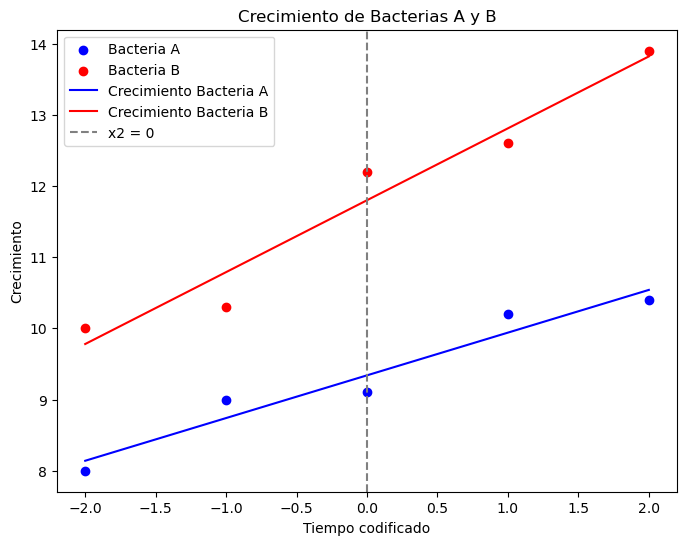

Predicción para Bacteria A en x2=0: 9.34
El valor para Bacteria A en x2 = 0: 9.1
Predicción para Bacteria B en x2=0: 11.80
El valor para Bacteria A en x2 = 0: 12.2


In [13]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
tiempo = np.array([-2, -1, 0, 1, 2, -2, -1, 0, 1, 2])
crecimiento = np.array([8.0, 9.0, 9.1, 10.2, 10.4, 10.0, 10.3, 12.2, 12.6, 13.9])
bacteria = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 para tipo A, 1 para tipo B
interaccion = bacteria * tiempo  # Término de interacción
data = pd.DataFrame({
    "Crecimiento": crecimiento,
    "Tiempo": tiempo,
    "Bacteria": bacteria,
    "Interaccion": interaccion
})
modelo = smf.ols("Crecimiento ~ Bacteria + Tiempo + Interaccion", data=data).fit()

tiempo_pred = np.linspace(-2, 2, 100)
pred_a = modelo.params["Intercept"] + modelo.params["Tiempo"] * tiempo_pred
pred_b = (
    modelo.params["Intercept"]
    + modelo.params["Bacteria"]
    + modelo.params["Tiempo"] * tiempo_pred
    + modelo.params["Interaccion"] * tiempo_pred
)

plt.figure(figsize=(8, 6))
plt.scatter(tiempo[data["Bacteria"] == 0], crecimiento[data["Bacteria"] == 0], label="Bacteria A", color="blue")
plt.scatter(tiempo[data["Bacteria"] == 1], crecimiento[data["Bacteria"] == 1], label="Bacteria B", color="red")
plt.plot(tiempo_pred, pred_a, label="Crecimiento Bacteria A", color="blue")
plt.plot(tiempo_pred, pred_b, label="Crecimiento Bacteria B", color="red")
plt.axvline(0, color="gray", linestyle="--", label="x2 = 0")
plt.title("Crecimiento de Bacterias A y B")
plt.xlabel("Tiempo codificado")
plt.ylabel("Crecimiento")
plt.legend()
plt.show()
pred_a_0 = modelo.params["Intercept"]
pred_b_0 = modelo.params["Intercept"] + modelo.params["Bacteria"]

print(f"Predicción para Bacteria A en x2=0: {pred_a_0:.2f}")
print("El valor para Bacteria A en x2 = 0:", crecimiento[2])
print(f"Predicción para Bacteria B en x2=0: {pred_b_0:.2f}")
print("El valor para Bacteria A en x2 = 0:", crecimiento[7])


In [16]:
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

y_hat = X @ beta_hat
residuals = Y - y_hat
sigma_squared = np.sum(residuals**2) / (len(crecimiento) - X.shape[1])

var_beta = sigma_squared * np.linalg.inv(X_transpose @ X)

# Vector a para probar si beta3 es 0
a = np.array([0, 0, 0, 1])

# Cálculo del estadístico t
numerador = a.T @ beta_hat
denominador = np.sqrt(a.T @ var_beta @ a)
t_stat = numerador / denominador

# Grados de libertad y valor crítico
df = len(crecimiento) - X.shape[1]
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df)

# Valor p
p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))

# Resultados
print(f"Estimación de beta: {beta_hat}")
print(f"Varianza de beta: \n{var_beta}")
print(f"t-stat: {t_stat:.4f}")
print(f"t-crit: {t_crit:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretación
if abs(t_stat) > t_crit:
    print("Se rechaza la hipótesis nula: hsy diferencia en el crecimiento de bacterias")
else:
    print("No se rechaza la hipótesis nula: no se afirma crecimiento de las bacterias")

Estimación de beta: [ 2.03333333e+01  3.33333333e-02 -2.25000000e-02  1.25000000e-04]
Varianza de beta: 
[[ 2.10493827e+00 -8.02469136e-03 -1.75000000e-02  4.16666667e-05]
 [-8.02469136e-03  1.23456790e-04 -1.75442651e-18  1.71330714e-21]
 [-1.75000000e-02 -0.00000000e+00  2.04166667e-04 -5.00000000e-07]
 [ 4.16666667e-05  0.00000000e+00 -5.00000000e-07  1.25000000e-09]]
t-stat: 3.5355
t-crit: 2.4469
p-value: 0.0123
Se rechaza la hipótesis nula: hsy diferencia en el crecimiento de bacterias


Problema12.\
Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv".

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [17]:
import pandas as pd
from scipy.stats import f_oneway
datos = pd.read_csv('datos.csv')
grupo_a = datos[datos["Grupo"] == "Grupo A"]["Datos"]
grupo_b = datos[datos["Grupo"] == "Grupo B"]["Datos"]
###grupo_c = datos[datos["Grupo"] == "Grupo C"]["Calificacion"], no hay grupo C
f_stat, p_value = f_oneway(grupo_a, grupo_b)
alpha = 0.05
print(f"Estadístico F: {f_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencias significativas entre las calificaciones de los grupos.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar diferencias significativas.")



Estadístico F: 0.0175
P-valor: 0.8973
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar diferencias significativas.


Problema 13.\
Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

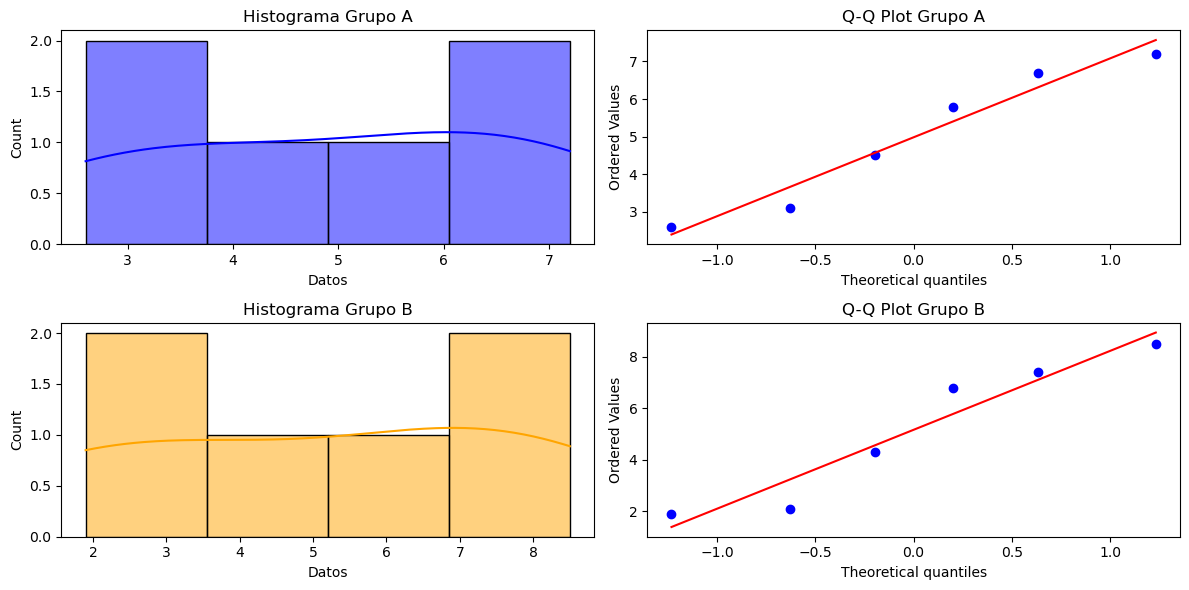

Prueba Shapiro-Wilk:
Grupo A: Estadístico = 0.9267, p-valor = 0.5552
Grupo B: Estadístico = 0.8948, p-valor = 0.3439
Los datos del Grupo A son normales.
Los datos del Grupo B son normales.

Prueba Mann-Whitney U:
Estadístico U = 17.0000, p-valor = 0.9372
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar una diferencia entre las medianas.


In [18]:
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, norm, probplot

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(grupo_a, kde=True, color="blue", bins=4)
plt.title("Histograma Grupo A")
plt.subplot(2, 2, 2)
probplot(grupo_a, dist="norm", plot=plt)
plt.title("Q-Q Plot Grupo A")

plt.subplot(2, 2, 3)
sns.histplot(grupo_b, kde=True, color="orange", bins=4)
plt.title("Histograma Grupo B")
plt.subplot(2, 2, 4)
probplot(grupo_b, dist="norm", plot=plt)
plt.title("Q-Q Plot Grupo B")

plt.tight_layout()
plt.show()

# Pruebas de normalidad (Shapiro-Wilk)
stat_a, p_a = shapiro(grupo_a)
stat_b, p_b = shapiro(grupo_b)

print("Prueba Shapiro-Wilk:")
print(f"Grupo A: Estadístico = {stat_a:.4f}, p-valor = {p_a:.4f}")
print(f"Grupo B: Estadístico = {stat_b:.4f}, p-valor = {p_b:.4f}")

alpha = 0.05
if p_a < alpha:
    print("Los datos del Grupo A no son normales.")
else:
    print("Los datos del Grupo A son normales.")

if p_b < alpha:
    print("Los datos del Grupo B no son normales.")
else:
    print("Los datos del Grupo B son normales.")

# --- b) Prueba no paramétrica para las medianas ---
# Mann-Whitney U test
stat_u, p_u = mannwhitneyu(grupo_a, grupo_b, alternative="two-sided")

print("\nPrueba Mann-Whitney U:")
print(f"Estadístico U = {stat_u:.4f}, p-valor = {p_u:.4f}")

if p_u < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las medianas.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar una diferencia entre las medianas.")